In [1]:
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import igraph
import seaborn as sns
###import packages
from scEasyMode import mousefilter
from scEasyMode import clusterplot
from scEasyMode import pymulti
from scEasyMode import sceasy

## read in data

In [2]:
###readin
osi= sceasy.read('osi_only.preprocessed')

In [3]:
### change things over into continuous time
sample_dict = {
    '0T':0.0,
    'OSI_T1_30m':0.5,
    'OSI_T2_2H':2,
    'OSI_T3_8H':8,
    'OSI_T4_24H':24,
    'OSI_T5_48H':48,
    'OSI_T6_3D':72,
    'OSI_T7_4D':96,
    'OSI_T8_6D':144,
    'OSI_T9_9D':216,
    'DMSO_T1_30m':0.5,
    'DMSO_T2_2H':2,
    'DMSO_T3_8H':8,
    'DMSO_T4_24H':24,
    'DMSO_T4_48H':48
}
###
osi.obs['time'] = osi.obs.apply(lambda row: sample_dict[row['sample']],axis=1) 
osi.obs['group'] = osi.obs.apply(lambda row: str(row['sample'])[:3],axis=1) 
###subset
osi= osi[osi.obs['group']!='DMS']

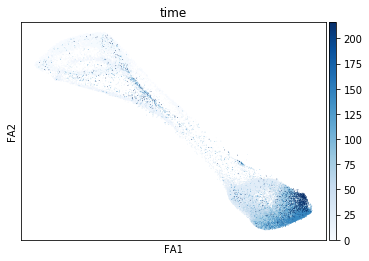

TGFB2


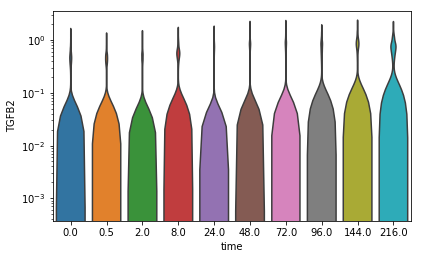

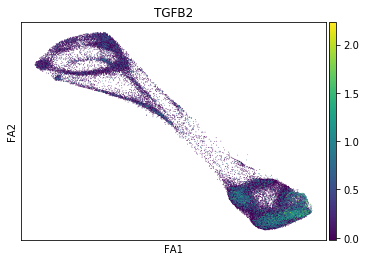

TGFB3


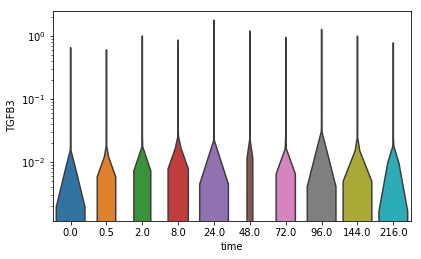

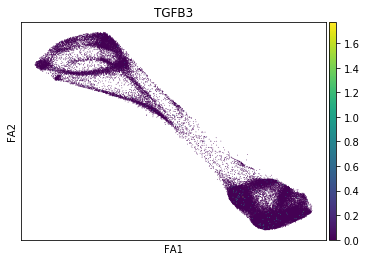

missing!  IFNB2
CTF1


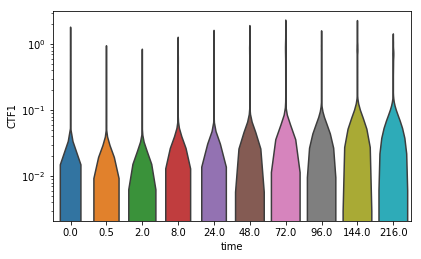

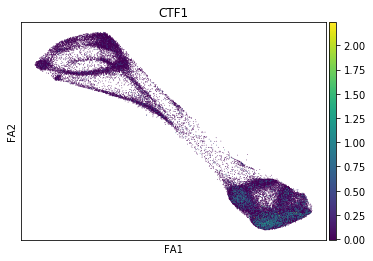

missing!  TNFB
TNFSF10


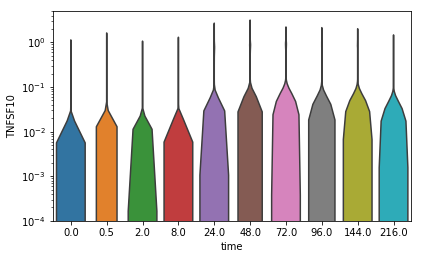

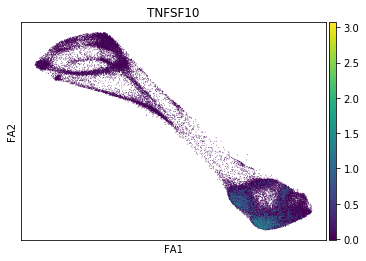

missing!  TNFSF13
TNFSF15


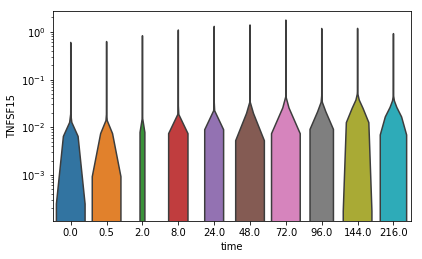

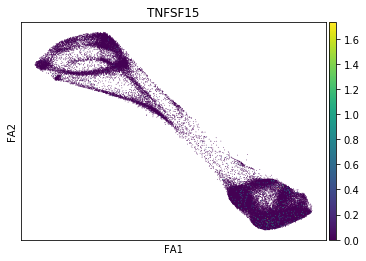

missing!  TNFA
missing!  INFB2
missing!  IL6
missing!  TNFB
missing!  LTA
missing!  TNFSF1
missing!  TNFSF13
missing!  APRIL
missing!  TALL2
missing!  ZTNF2
missing!  UNQ383
missing!  PRO715
missing!  TNFA
missing!  TNF
missing!  TNFSF2


In [43]:
### read in genes to visualize
vis = pd.read_csv('090220_genes_look.txt',header=None)[0].tolist()
vis = [x.upper() for x in vis]
### double check gene names
sc.pl.draw_graph(osi,color='time',cmap='Blues')
for gene in vis:
    if gene in osi.var_names:
        print(gene)
        sc.pl.violin(osi, gene, groupby='time',stripplot=False,log=True)
        sc.pl.draw_graph(osi,color=gene)
    else:
        print('missing! ',gene)

In [33]:
osi.var.to_csv('genes.csv',sep=',')